# ft_linear_regression

## Mandatory part

First of all, let's get our dataset loaded in our python env :

In [12]:
import csv

mileages = []
prices = []

with open('data.csv', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    lines = []

    for row in reader:
        lines.append(row)
    
    lines.pop(0)
    
    for line in lines:
        mileages.append(int(line[0]))
        prices.append(int(line[1]))

Now let's train our algorithm so that he can get it too !
Now, we need to scale our data, otherwise the calculations are most likely going to overflow.
There is multiple normalization methods (from this [super cool article](https://medium.com/@yennhi95zz/6-a-beginners-guide-to-gradient-descent-and-feature-scaling-in-machine-learning-bbbeecbb5d51)) :

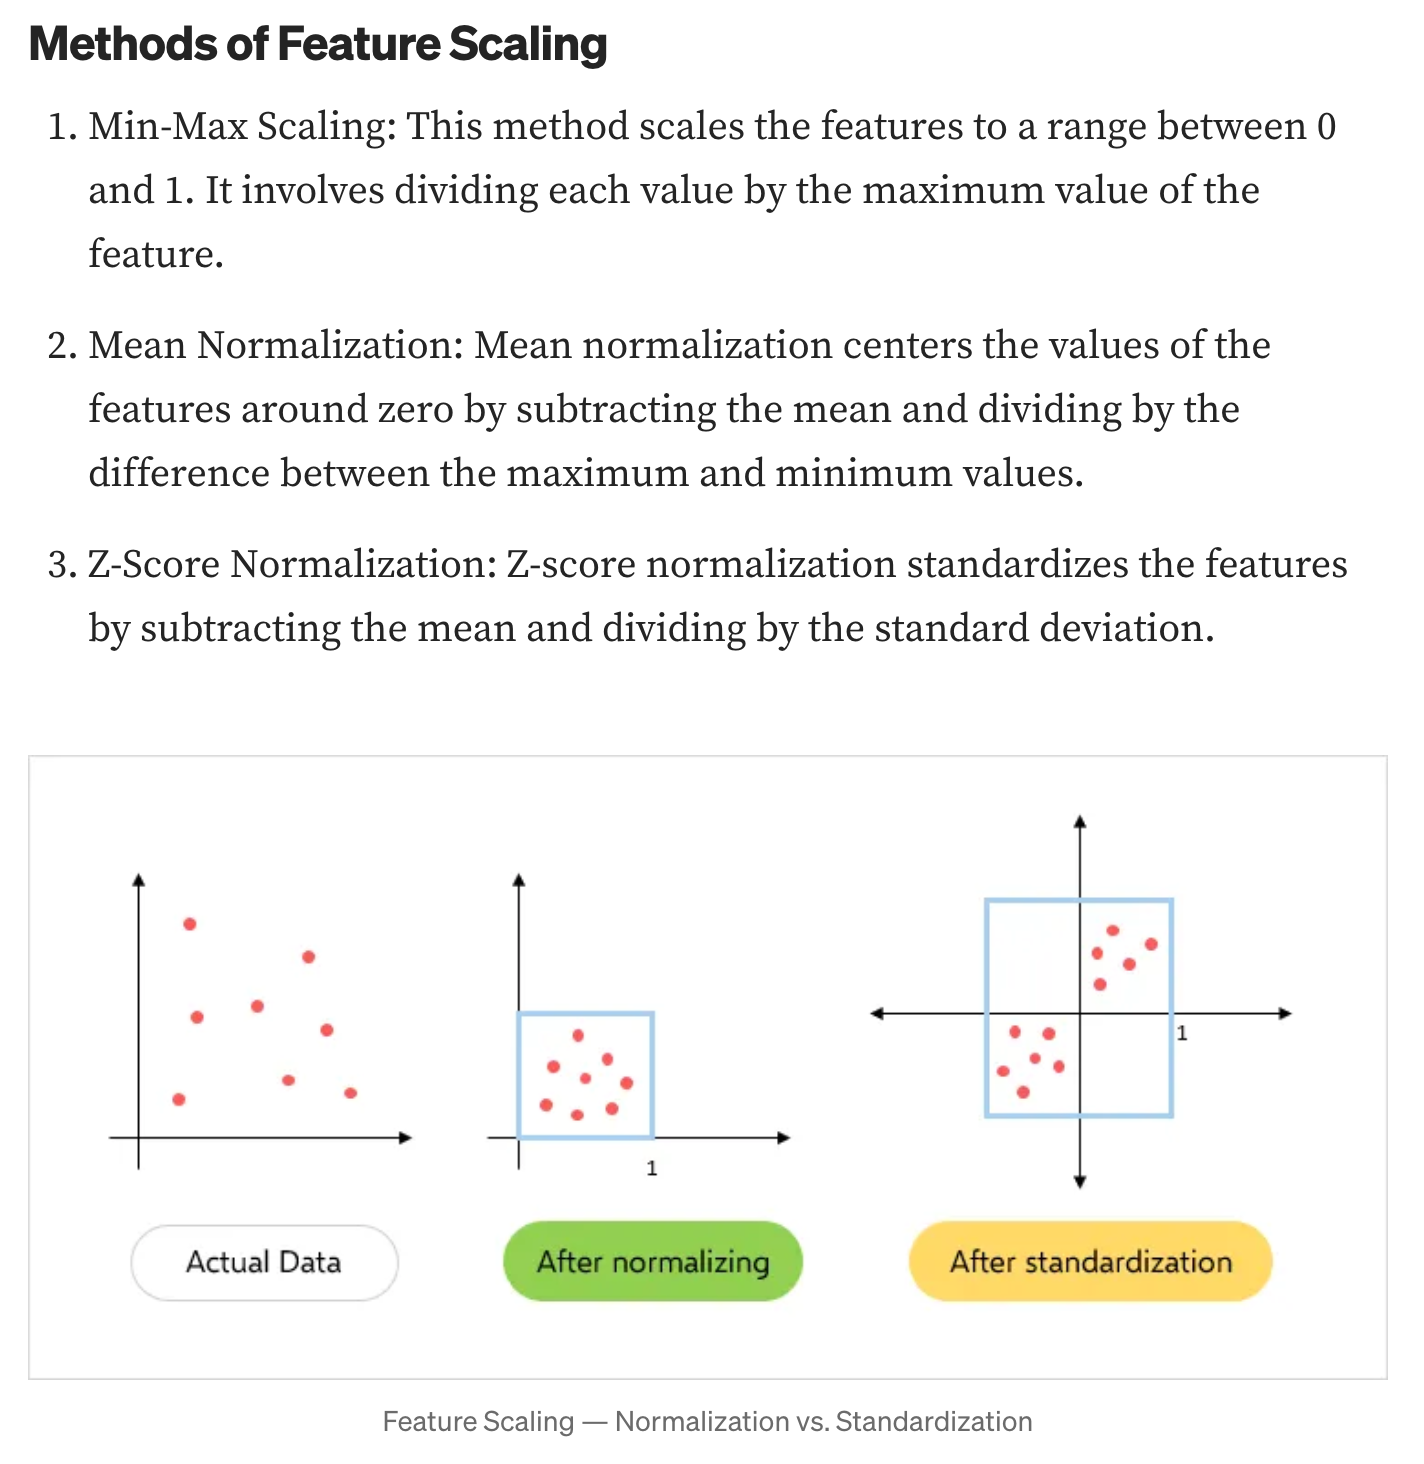

Seems like z-score normalization is the best option (I already tried both others and the slope is here but not with the right angle), here is how to calculate the standard deviation for a list of data :

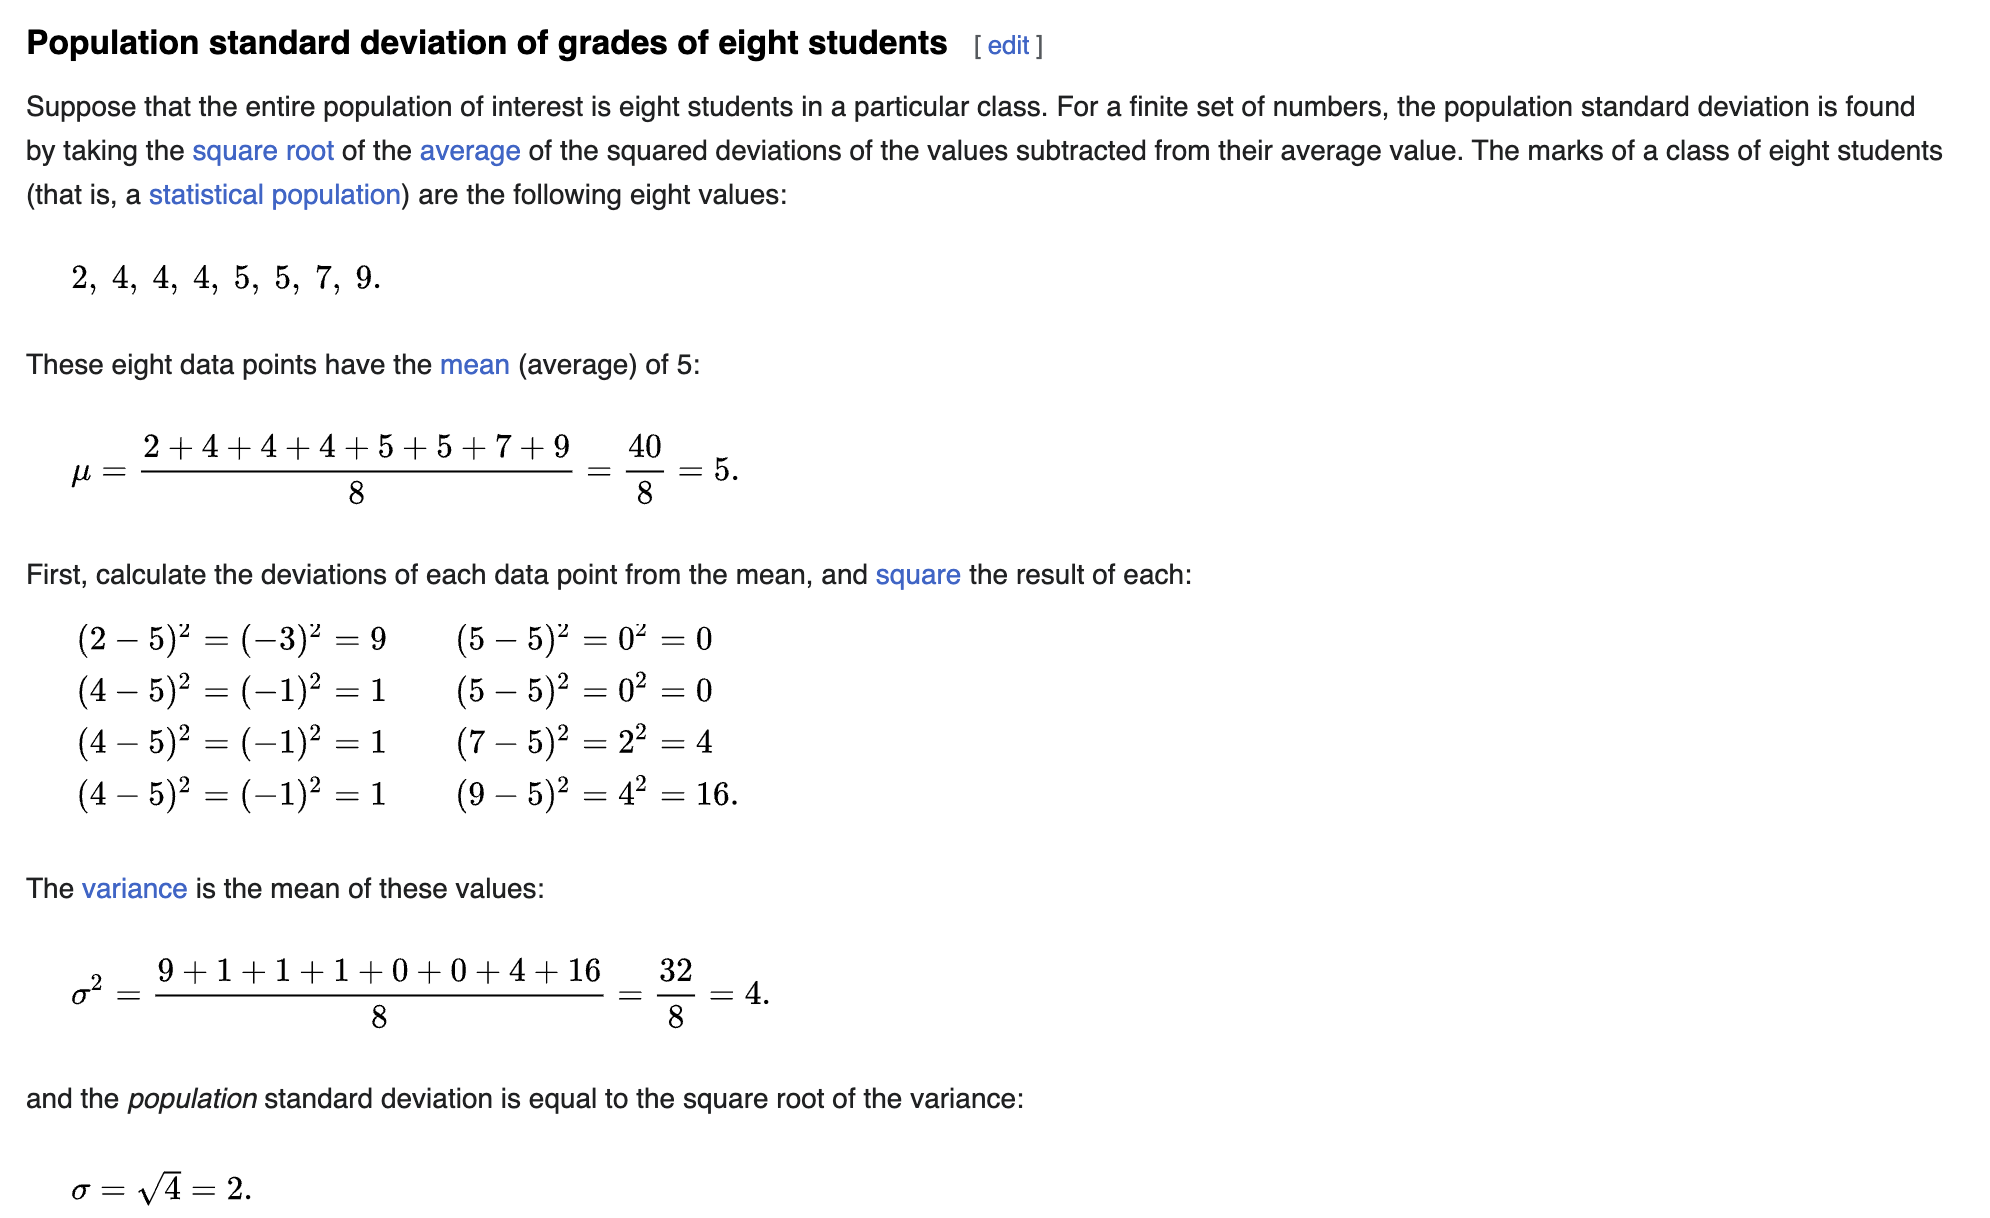

In [13]:
import statistics
import math

# here we'll use z-score normalization,
# even if the list that we pass is incomplete, the mean and std deviation has to be calculated with the full dataset, since that's what the model is trained with
def scale(numbers: list):
    numbers_scaled = []
    mean = statistics.mean(mileages)
    deviations = []

    for mileage in mileages:
        deviations.append(pow(mileage - mean, 2))

    std_deviation = math.sqrt(statistics.mean(deviations))

    for number in numbers:
        numbers_scaled.append((number - mean) / std_deviation)

    return numbers_scaled

mileages_scaled = scale(mileages)

2. Then, we need to implement the gradient descent algorithm from the subject :

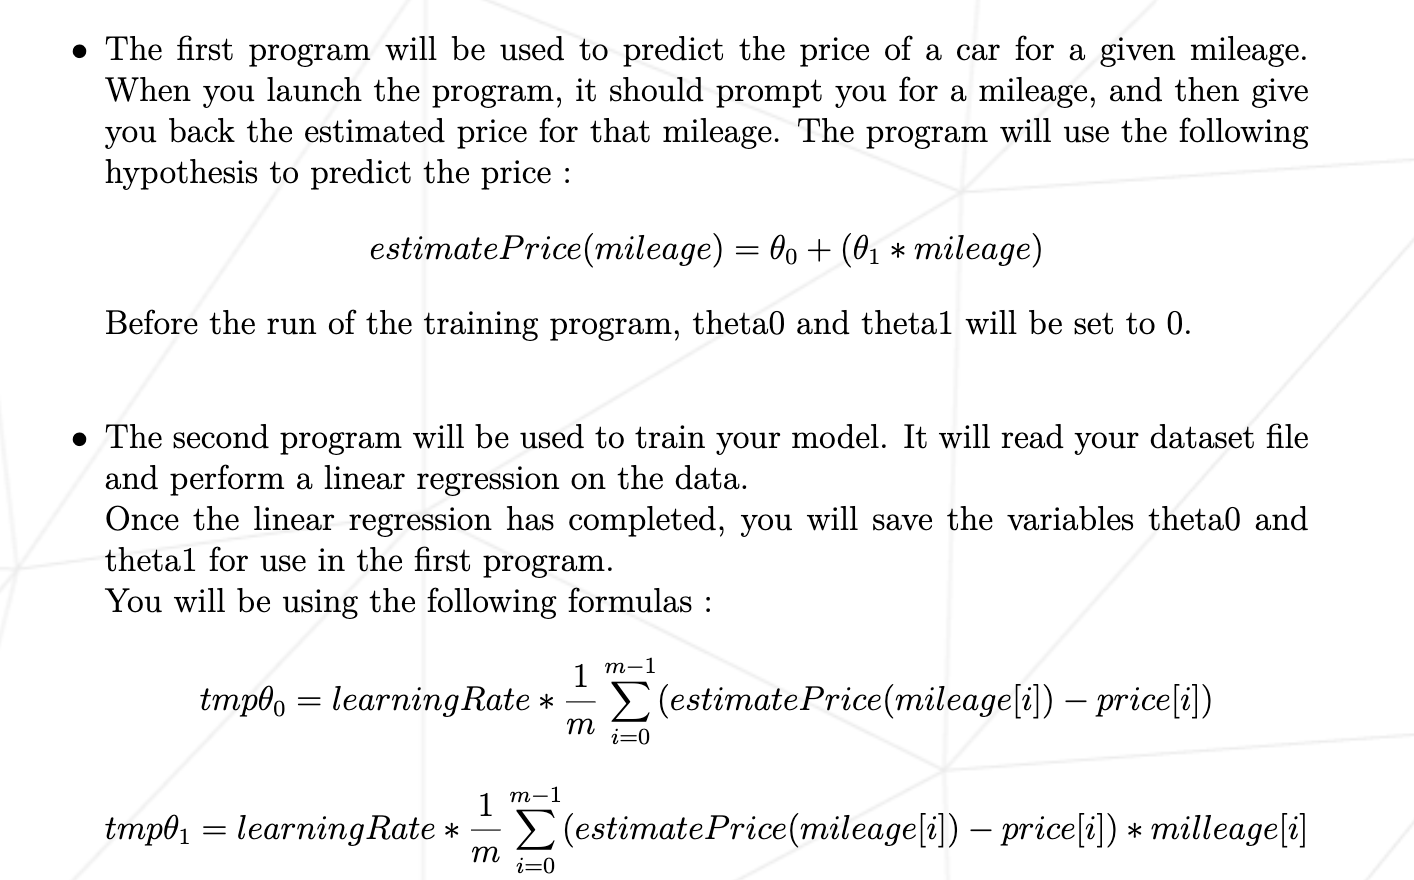

In [14]:
class LinearRegression:
  def __init__(self):
    self.theta0 = 0
    self.theta1 = 0

  def estimate_price(self, mileage):
    return self.theta0 + (self.theta1 * mileage)

  def train_model(self, mileages, prices, learning_rate=0.01, epochs=100):
    m = len(mileages)

    for i in range(epochs):
      cost_theta0 = []
      cost_theta1 = []
      
      for y, mileage in enumerate(mileages):
        estimated_price = self.estimate_price(mileage)

        cost_theta0.append(estimated_price - prices[y])
        cost_theta1.append((estimated_price - prices[y]) * mileage)

      tmp_theta0 = sum(cost_theta0) / m
      tmp_theta1 = sum(cost_theta1) / m

      self.theta0 -= learning_rate * tmp_theta0
      self.theta1 -= learning_rate * tmp_theta1

model = LinearRegression()
model.train_model(mileages_scaled, prices, epochs=50, learning_rate=0.1)

## Bonus part

We'll now see how our optimized function looks :

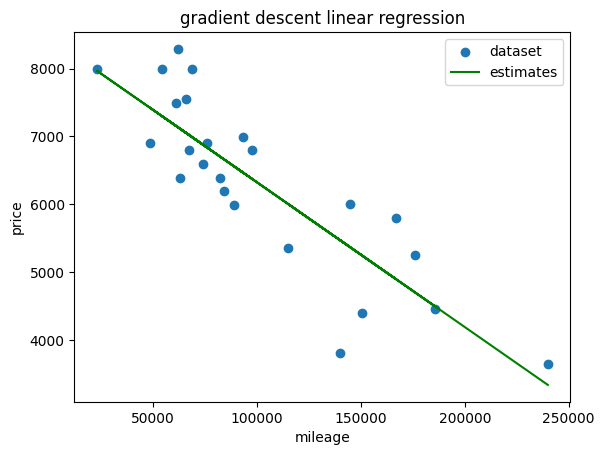

In [15]:
from matplotlib import pyplot

estimated_prices = []

for mileage in mileages_scaled :
    estimated_prices.append(model.estimate_price(mileage))

# include values from the dataset
pyplot.scatter(mileages, prices, label='dataset')

# include the trendline from estimations
pyplot.plot(mileages, estimated_prices, label='estimates', color='green')

pyplot.xlabel('mileage')
pyplot.ylabel('price')
pyplot.title('gradient descent linear regression')
pyplot.legend()
pyplot.show()

And then here the little function to calculate the precision of the model :

In [16]:
import numpy

def precision():
    errors = abs(numpy.array(prices) - numpy.array(estimated_prices))
    percentages = errors / prices * 100 # this is the error rate for each entry, to have the success rate, it's just 100% - error rate
    
    # we return the avg of the success rates
    return statistics.mean(100 - percentages)

print('\n Our model has a precision of ' + str(int(precision())) + '% !')


 Our model has a precision of 90% !
